In [1]:
import os
import pickle
from collections import defaultdict, OrderedDict

import networkx as nx
import nxviz as nv
import pandas as pd
from gensim.corpora import Dictionary

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
p1 = 219  # william goode
p2 = 20  # Minerva Jones

## 43, 129 --> 0.5663854115643483

Main goal of this notebook is just to create nice viz of the different points of the graph throughout it's lifecycle

In [3]:
p_graph = nx.read_gpickle(f'../data/combined_graphs/{p2}/{p1}.gpickle')

In [4]:
p_graph.nodes(data=True)

NodeDataView({18208: {'doc_id': -1, 'tf_idf': -1, 'term_id': 1302, 'type': 'SYN'}, 17580: {'doc_id': -1, 'tf_idf': -1, 'term_id': 674, 'type': 'SYN'}, 17283: {'doc_id': -1, 'tf_idf': -1, 'term_id': 377, 'type': 'SYN'}, 21392: {'doc_id': -1, 'tf_idf': -1, 'term_id': 4486, 'type': 'SYN'}, 22438: {'doc_id': -1, 'tf_idf': -1, 'term_id': 5532, 'type': 'SYN'}, 22439: {'doc_id': -1, 'tf_idf': -1, 'term_id': 5533, 'type': 'SYN'}, 22440: {'doc_id': -1, 'tf_idf': -1, 'term_id': 5534, 'type': 'SYN'}, 22442: {'doc_id': -1, 'tf_idf': -1, 'term_id': 5536, 'type': 'SYN'}, 17051: {'doc_id': -1, 'tf_idf': -1, 'term_id': 145, 'type': 'SYN'}, 19360: {'doc_id': -1, 'tf_idf': -1, 'term_id': 2454, 'type': 'SYN'}, 1163: {'doc_id': 20, 'tf_idf': 0.01355990646613538, 'term_id': 61, 'type': 'SPA'}, 1169: {'doc_id': 20, 'tf_idf': 0.15764392225410856, 'term_id': 396, 'type': 'SPA'}, 1176: {'doc_id': 20, 'tf_idf': 0.15191470865798798, 'term_id': 1383, 'type': 'SPA'}, 1188: {'doc_id': 20, 'tf_idf': 0.37957527558217

In [5]:
chapter_names = pickle.load(open('../data/chapter_names.p', 'rb'))
spa_dictionary = Dictionary.load('../data/spa.dict')
syn_dictionary = Dictionary.load('../data/syn.dict')

In [6]:
for node, data in p_graph.nodes(data=True):
    # it's a synonym node
    if data['type'] == 'SYN':
        data['document'] = 'Synonym'
        data['term'] = syn_dictionary[data['term_id']]
        
    else:
        data['document'] = chapter_names[str(data['doc_id'])]
        data['term'] = spa_dictionary[data['term_id']]

In [7]:
p_graph.nodes(data=True)

NodeDataView({18208: {'doc_id': -1, 'tf_idf': -1, 'term_id': 1302, 'type': 'SYN', 'document': 'Synonym', 'term': 'capture'}, 17580: {'doc_id': -1, 'tf_idf': -1, 'term_id': 674, 'type': 'SYN', 'document': 'Synonym', 'term': 'get'}, 17283: {'doc_id': -1, 'tf_idf': -1, 'term_id': 377, 'type': 'SYN', 'document': 'Synonym', 'term': 'deep'}, 21392: {'doc_id': -1, 'tf_idf': -1, 'term_id': 4486, 'type': 'SYN', 'document': 'Synonym', 'term': 'bass'}, 22438: {'doc_id': -1, 'tf_idf': -1, 'term_id': 5532, 'type': 'SYN', 'document': 'Synonym', 'term': 'thick'}, 22439: {'doc_id': -1, 'tf_idf': -1, 'term_id': 5533, 'type': 'SYN', 'document': 'Synonym', 'term': 'cryptic'}, 22440: {'doc_id': -1, 'tf_idf': -1, 'term_id': 5534, 'type': 'SYN', 'document': 'Synonym', 'term': 'abstruse'}, 22442: {'doc_id': -1, 'tf_idf': -1, 'term_id': 5536, 'type': 'SYN', 'document': 'Synonym', 'term': 'deeply'}, 17051: {'doc_id': -1, 'tf_idf': -1, 'term_id': 145, 'type': 'SYN', 'document': 'Synonym', 'term': 'search'}, 193

In [8]:
p_graph = nx.relabel_nodes(
    p_graph,
    {node: f"{node}: {data['term']}" for node, data in p_graph.nodes(data=True)}
)

<Figure size 1152x576 with 0 Axes>

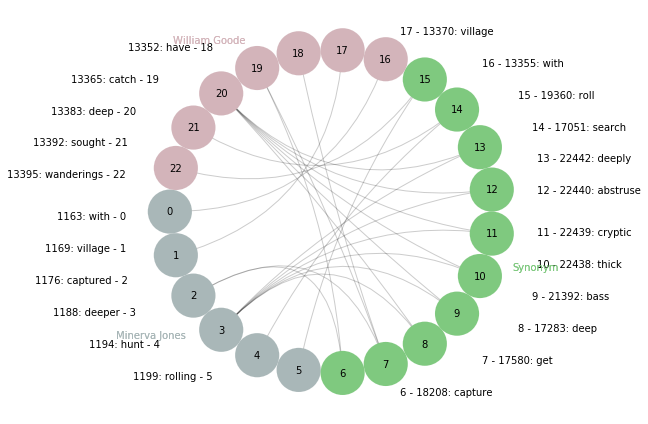

In [9]:
fig = plt.gcf()
fig.set_size_inches(16, 8)

ap = nv.CircosPlot(
    p_graph, 
    node_color='doc_id', 
    node_grouping='document', 
    group_label_position='middle',
    group_label_color=True,
    node_labels=True, 
    node_label_layout="numbers",
    figsize=(10, 6)
)

ap.draw_group_labels()

ap.draw()

plt.tight_layout()
plt.savefig('../data/full_similarities.png');

In [10]:
# Number of triangle relationships
total_relationships = 0
for node, data in p_graph.nodes(data=True):
    if data['type'] == 'SYN':
        num_p1_nodes = 0
        num_p2_nodes = 0
        
        for neighbor in p_graph.neighbors(node):
            if p_graph.node[neighbor]['doc_id'] == 219:
                num_p1_nodes += 1
            else:
                num_p2_nodes += 1
        
        total_relationships += (num_p1_nodes * num_p2_nodes)

In [11]:
total_relationships

11

In [12]:
# direct relationships
dr_nodes = [
    node for node, data in p_graph.nodes(data=True)
    if data['type'] == 'SPA'
    and 'SPA' in [p_graph.node[neighbor]['type'] for neighbor in p_graph.neighbors(node)]
]

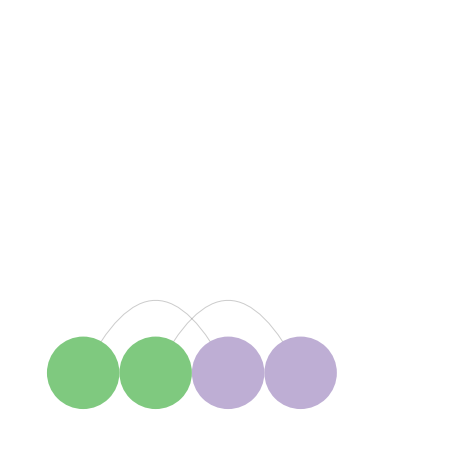

In [13]:
ap = nv.ArcPlot(
    p_graph.subgraph(dr_nodes),
    node_color='doc_id', 
    node_grouping='document', 
    group_label_position='middle',
    group_label_color=True,
    node_labels=True, 
    node_label_layout="numbers",
    figsize=(8, 8)
)

ap.draw()
plt.savefig('../data/direct_relationship.png');

In [14]:
p_graph.subgraph(dr_nodes).nodes(data=True)

NodeDataView({'13355: with': {'doc_id': 219, 'tf_idf': 0.014904798103809097, 'term_id': 61, 'type': 'SPA', 'document': 'William Goode', 'term': 'with'}, '13370: village': {'doc_id': 219, 'tf_idf': 0.08663964015379098, 'term_id': 396, 'type': 'SPA', 'document': 'William Goode', 'term': 'village'}, '1163: with': {'doc_id': 20, 'tf_idf': 0.01355990646613538, 'term_id': 61, 'type': 'SPA', 'document': 'Minerva Jones', 'term': 'with'}, '1169: village': {'doc_id': 20, 'tf_idf': 0.15764392225410856, 'term_id': 396, 'type': 'SPA', 'document': 'Minerva Jones', 'term': 'village'}})

In [15]:
syn_nodes = set()

for node, data in p_graph.nodes(data=True):
    if data['type'] == 'SYN':
        syn_nodes.add(node)
        
        for neighbor in p_graph.neighbors(node):
            syn_nodes.add(neighbor)

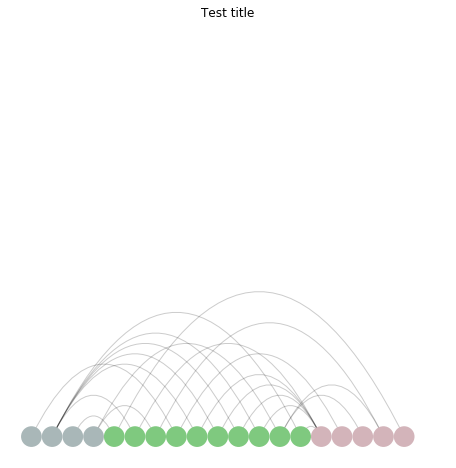

In [16]:
ap = nv.ArcPlot(
    p_graph.subgraph(list(syn_nodes)),
    node_color='doc_id', 
    node_grouping='document', 
    group_label_position='middle',
    group_label_color=True,
    node_labels=True, 
    node_label_layout="numbers",
    figsize=(8, 8)
)

ap.draw()
plt.title('Test title')
plt.savefig('../data/synonyms.png');

In [17]:
base_p1 = nx.read_gpickle(f'../data/base_graphs/{p1}.gpickle')
base_p2 = nx.read_gpickle(f'../data/base_graphs/{p2}.gpickle')

In [18]:
spa_nodes_p1 = set()
spa_nodes_p2 = set()

for node, data in p_graph.nodes(data=True):
    if data['doc_id'] == p1:
        spa_nodes_p1.add(data['term_id'])
    elif data['doc_id'] == p2:
        spa_nodes_p2.add(data['term_id'])

In [19]:
base_p1_uncontributing_nodes = [
    data['term_id'] for node, data in base_p1.nodes(data=True)
    if data['type'] == 'SPA' 
    and data['term_id'] not in spa_nodes_p1
]

base_p2_uncontributing_nodes = [
    data['term_id'] for node, data in base_p2.nodes(data=True)
    if data['type'] == 'SPA' 
    and data['term_id'] not in spa_nodes_p2
]

In [20]:
spa_dict = Dictionary.load('../data/spa.dict')

In [21]:
uncontributing_terms = list()
for node_list in [base_p1_uncontributing_nodes, base_p2_uncontributing_nodes]:
    for term_id in node_list:
        uncontributing_terms.append(spa_dict[term_id])

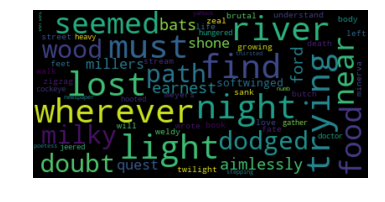

In [22]:
from wordcloud import WordCloud


text = ' '.join(uncontributing_terms)

# # Generate a word cloud image
# wordcloud = WordCloud().generate(text)

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('../data/uncontributing_wordcloud.png');